# A sentiment Analysis EDA 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [64]:
df.shape

(1407328, 6)

descriptive statistics for headline

In [65]:
df["headline_length"]=df["headline"].apply(len)
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


lets describe the headline

In [66]:
headline_stats = df['headline_length'].describe()
headline_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

###### from this the data have maximum of 512 and minimum of 3 characters of headline the data have 

### And now lets Count the number of articles per publisher to identify which publishers are most active.

In [67]:
publisher_counts = df["publisher"].value_counts()
publisher_counts.head(8)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Name: count, dtype: int64

#### Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
#### because there is some date data inconsistanci i use the infer_datetime_format=True while changing in to datatime format

In [68]:
df["date"] = pd.to_datetime(df["date"],format='mixed',utc=True)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87


In [69]:
data_stats = df["date"].describe()
data_stats

count                                1407328
mean     2015-08-22 01:54:11.875360256+00:00
min                2009-02-14 00:00:00+00:00
25%                2013-01-16 00:00:00+00:00
50%                2015-09-23 00:00:00+00:00
75%                2018-05-21 00:00:00+00:00
max                2020-06-11 21:12:35+00:00
Name: date, dtype: object

##### from this we have a the most recent pubication is 2020-06-11 21:12:35+00:00 and the earlist was 2009-02-14 00:00:00+00:00

#### now lets make the data time series which will be easy to anlyse trends over time

In [70]:
df.set_index("date" , inplace=True)
df.head()

,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2020-06-05 14:30:54+00:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


##### Resampling the Data by Day 

<Axes: title={'center': 'Daily publication Frequency'}, xlabel='date'>

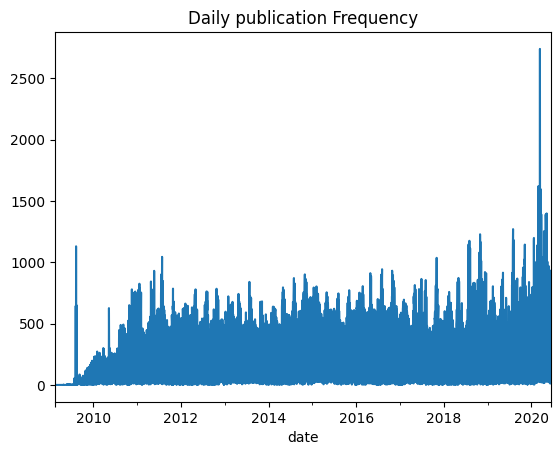

In [79]:
resample_data_by_day = df['headline'].resample('D').count()
resample_data_by_day.plot(title="Daily publication Frequency")

### from this most of publications are held on the year of 2020